# Strawberry Price Prediction - Exploratory Data Analysis

Objective : create a model that would predict the price of strawberries at a 2 weeks horizon, using past data to train the model and the 2022-2023 season data for testing.

With an internet search, the price of strawberries depend of :
* Supply: season, yield, weather, diseases
* Demand: consumption, events, competition
* Production costs: inputs, labor, crop type
* Logistics: transportation, storage, preservation
* Policies and economics: taxes, subsidies, currency fluctuations

This notebook explores the strawberry price prediction dataset, focusing on:
1. Data overview and missing values
2. Price distribution and trends
3. Weather features analysis
4. Seasonal patterns

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from src.utils import *
from src.parameter import get_dict_params

## 1. Load and Examine Data

In [26]:
# Load data
df = pd.read_csv('data/raw/senior_ds_test.csv')
# Load of parameters
dict_params = get_dict_params()

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nSample Data:\n", df.head())

Dataset Shape: (521, 15)

Columns: ['Unnamed: 0', 'year', 'week', 'windspeed', 'temp', 'cloudcover', 'precip', 'solarradiation', 'start_date', 'end_date', 'category', 'unit', 'price_min', 'price_max', 'price']

Data Types:
 Unnamed: 0          int64
year                int64
week                int64
windspeed         float64
temp              float64
cloudcover        float64
precip            float64
solarradiation    float64
start_date         object
end_date           object
category           object
unit               object
price_min         float64
price_max         float64
price             float64
dtype: object

Sample Data:
    Unnamed: 0  year  week  windspeed       temp  cloudcover    precip  \
0           1  2013    28  21.900000  26.100000   13.500000  0.013000   
1           2  2013    29  24.185714  26.914286   10.242857  0.000000   
2           3  2013    30  21.728571  27.871429   13.785714  0.000000   
3           4  2013    31  22.971429  27.014286   18.900000  0.00

## Onthology
Each row represents one week of observations, including weather conditions, solar radiation, and strawberry price ranges.

| Column Name      | Description                                                                                       |
| ---------------- | ------------------------------------------------------------------------------------------------- |
| `year`           | The calendar year of the observation.                                                             |
| `week`           | week number, corresponding to the weekly aggregation.                               |
| `windspeed`      | Average wind speed during the week (km/h or m/s). |
| `temp`           | Average air temperature during the week (°C).                                                     |
| `cloudcover`     | Average cloud cover during the week (%).                                                          |
| `precip`         | Total precipitation during the week (mm).                                                         |
| `solarradiation` | Average solar radiation during the week (W/m²).                                                   |
| `start_date`     | Start date of the week (YYYY-MM-DD).                                                              |
| `end_date`       | End date of the week (YYYY-MM-DD).                                                                |
| `category`       | Quality or classification category for the strawberries.                |
| `unit`           | Pricing unit, e.g. "Euros/kg".                                                                    |
| `price_min`      | Minimum observed price during the week.                                   |
| `price_max`      | Maximum observed price during the week.                                   |
| `price`          | Average price during the week.                          |


## Database metadata
This dataset combines weekly strawberry market prices with meteorological data for a specific region. It is aggregated data.

In [18]:
# Correcting types date
for col in [x for x in df.columns if 'date' in x]:
    df[col] = pd.to_datetime(df[col])


    Missing value – This refers to the situation when specific measurement was not collected. The basic requirement here is that the missing value rate should not be greater than 10 percent for any given time period. In a case in which a single value is missing, it should be indicated by using a predefined value (for example, ‘9999') and not ‘0,' which could be a valid measurement.
    Measurement accuracy – The actual value of consumption or temperature should be accurately recorded. Inaccurate measurements will produce inaccurate forecasts. Typically, the measurement error should be lower than 1 percent relative to the true value.
    Time of measurement – It is required that the actual time stamp of the data collected will not deviate by more than 10 seconds relative to the true time of the actual measurement.
    Synchronization – When multiple data sources are being used (for example, consumption and temperature), we must ensure that there are no time synchronization issues between them. This means that the time difference between the collected time stamp from any two independent data sources should not exceed more than 10 seconds.
    Latency – As discussed earlier, in the section “Data Ingestion,” we are dependent on a reliable data flow and ingestion process. To control that, we must ensure that we control the data latency. This is specified as the time difference between the time that the actual measurement was taken and the time at which it has been loaded.


## 2. Missing Values Analysis

Missing Values Count:

Unnamed: 0          0
year                0
week                0
windspeed           0
temp                0
cloudcover          0
precip              0
solarradiation      0
start_date        242
end_date          242
category          242
unit              242
price_min         242
price_max         242
price             242
dtype: int64


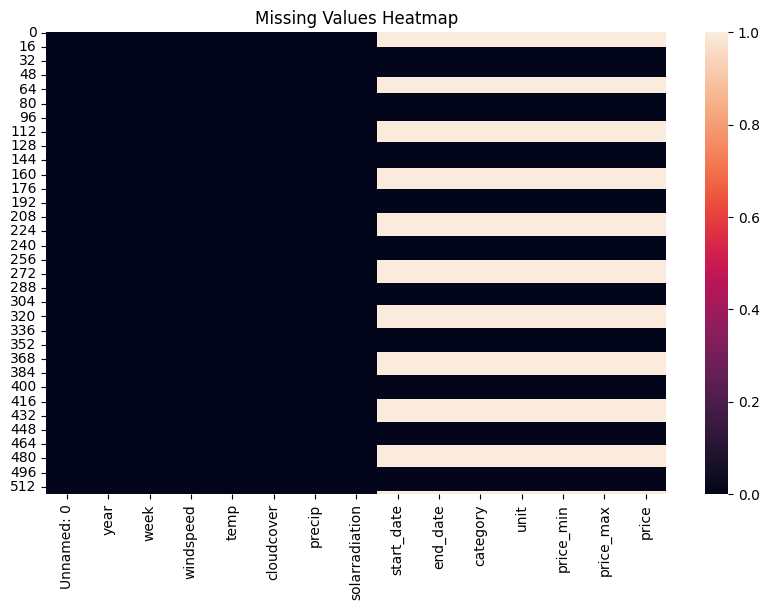

In [19]:
# Check missing values
print("Missing Values Count:\n")
print(df.isnull().sum())

# Plot missing values heatmap
plot_missing_values(df)

Obs : the missing data are not random. It seems that this dataframe comes from a merging of a weather database and a price database. I think the price was not present for some weeks.

In [20]:
# Exploration of the missing data.
df.iloc[255:260]

,Unnamed: 0,year,week,windspeed,temp,cloudcover,precip,solarradiation,start_date,end_date,category,unit,price_min,price_max,price
255,256,2018,22,20.357143,22.128571,40.157143,2.322143,270.014286,2018-05-28,2018-06-03,I,Euros/kg,0.82,0.82,0.82
256,257,2018,23,19.642857,22.671429,48.657143,1.330714,255.814286,2018-06-04,2018-06-10,I,Euros/kg,0.84,0.84,0.84
257,258,2018,24,19.585714,24.985714,15.857143,0.000000,319.028571,NaT,NaT,NaN,NaN,NaN,NaN,NaN
258,259,2018,25,20.014286,26.014286,4.771429,0.000000,318.342857,NaT,NaT,NaN,NaN,NaN,NaN,NaN
259,260,2018,26,19.157143,26.800000,19.571429,0.002000,293.514286,NaT,NaT,NaN,NaN,NaN,NaN,NaN


/home/briacleguillou/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/strawberries-price-prediction-RFzSQChC-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/briacleguillou/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/strawberries-price-prediction-RFzSQChC-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


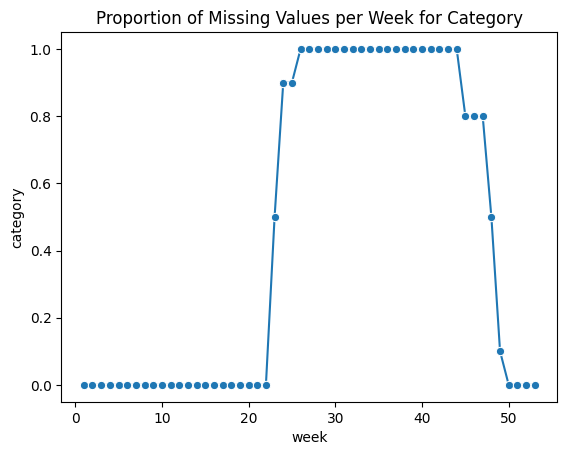

In [21]:
df_week_mv = df.loc[:,['week', 'category']].set_index('week').isna().groupby('week').mean()

# Graphic
sns.lineplot(data=df_week_mv, x='week', y='category', marker='o', color='tab:blue')
plt.title('Proportion of Missing Values per Week for Category')
plt.show()

Obs : From the week 24 to 50, the prices are missing in the database.

/home/briacleguillou/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/strawberries-price-prediction-RFzSQChC-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/briacleguillou/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/strawberries-price-prediction-RFzSQChC-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/briacleguillou/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/strawberries-price-prediction-RFzSQChC-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remo

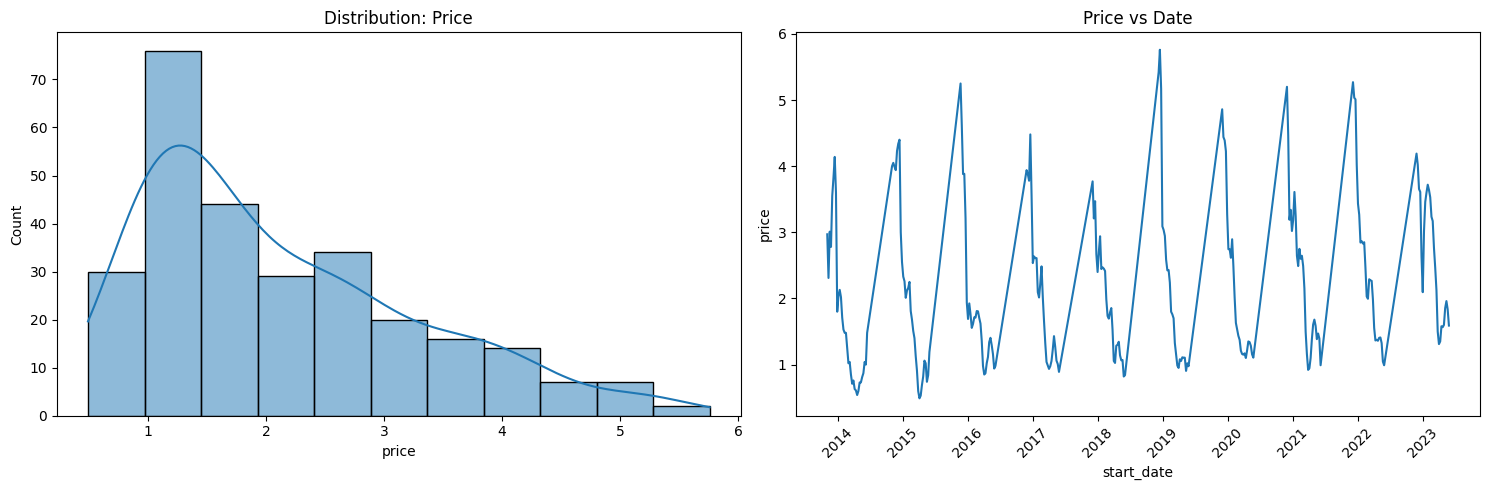


Price Statistics (Training Set):
count    279.000000
mean       2.118728
std        1.160889
min        0.490000
25%        1.160000
50%        1.760000
75%        2.805000
max        5.760000
Name: price, dtype: float64


In [22]:
# Plot price distribution and time series
plot_price_distribution(df)

# Basic statistics
print("\nPrice Statistics (Training Set):")
print(df['price'].describe())

Obs : the price distribution seems to be a gamma distribution, skewed to the left (low price).

## 3. Split Train/Test Before Analysis

In [23]:
# Split data
train_df, test_df = split_train_test(df)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

# Display date ranges
print("\nTraining data date range:")
print(f"Start: {train_df['start_date'].min()}, End: {train_df['start_date'].max()}")
print("\nTesting data date range:")
print(f"Start: {test_df['start_date'].min()}, End: {test_df['start_date'].max()}")

Training set shape: (443, 15)
Testing set shape: (78, 15)

Training data date range:
Start: 2013-11-04 00:00:00, End: 2021-12-27 00:00:00

Testing data date range:
Start: 2022-01-03 00:00:00, End: 2023-05-29 00:00:00


## 5. Weather Features Analysis

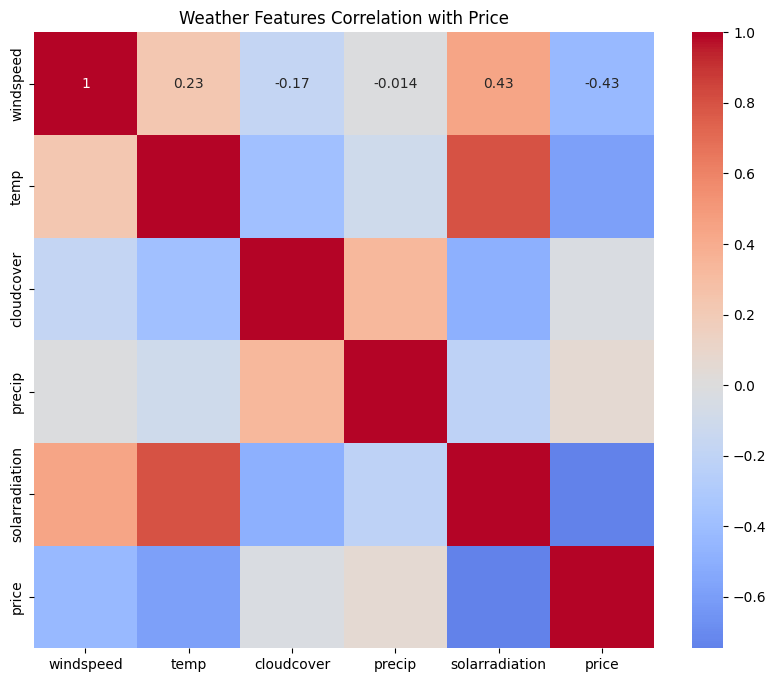


Weather Features Statistics (Training Set):
        windspeed        temp  cloudcover      precip  solarradiation
count  443.000000  443.000000  443.000000  443.000000      443.000000
mean    18.830990   19.337182   36.474170    0.835831      207.015737
std      4.423944    6.208523   14.001739    2.584528       81.296202
min      8.014286    6.428571    4.771429    0.000000       57.085714
25%     16.114286   13.550000   26.207143    0.000000      130.492857
50%     18.971429   19.014286   37.085714    0.020571      202.742857
75%     21.357143   24.764286   46.485714    0.548571      280.871429
max     36.728571   30.985714   75.928571   33.919857      358.571429


In [24]:
# Plot correlations
plot_weather_correlations(train_df)

# Weather features statistics
weather_cols = ['windspeed', 'temp', 'cloudcover', 'precip', 'solarradiation']
print("\nWeather Features Statistics (Training Set):")
print(train_df[weather_cols].describe())

## 6. Seasonal Patterns

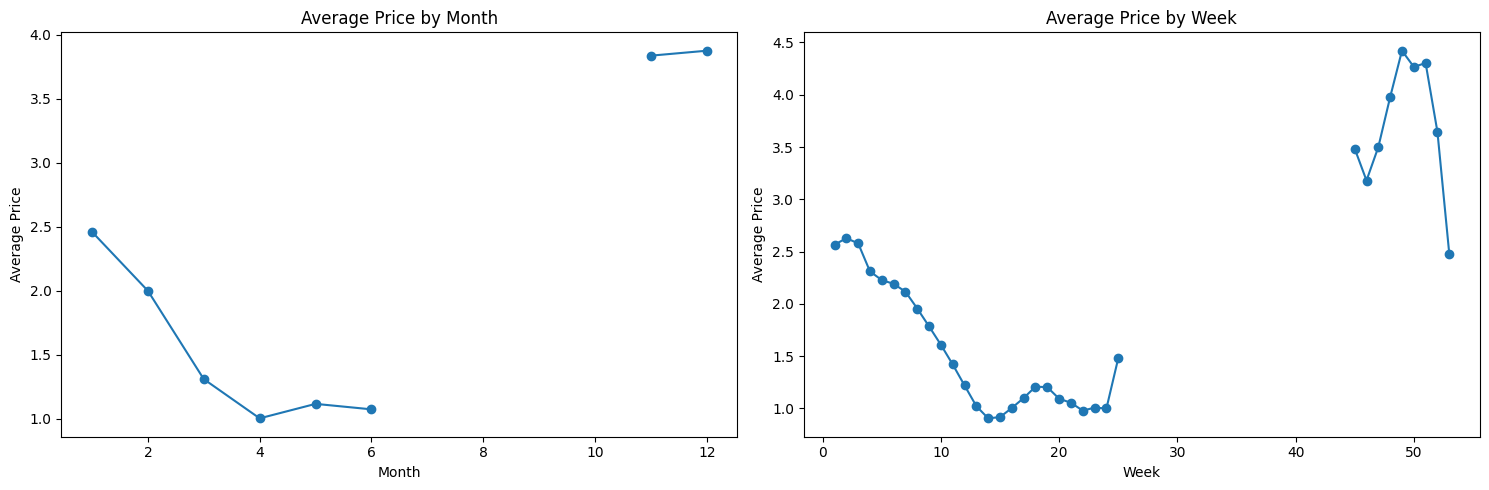


Average Price by Year:
year
2013    3.273750
2014    1.842727
2015    1.892414
2016    1.852321
2017    1.892308
2018    2.142500
2019    2.103654
2020    2.118704
2021    2.380370
Name: price, dtype: float64


In [25]:
# Plot seasonal patterns
plot_seasonal_patterns(train_df)

# Additional seasonal analysis
print("\nAverage Price by Year:")
print(train_df.groupby('year')['price'].mean())

## 7. Key Findings and Next Steps

1. Missing Values Pattern:
   - [To be filled after analysis]

2. Price Trends:
   - [To be filled after analysis]

3. Weather Correlations:
   - [To be filled after analysis]

4. Seasonal Effects:
   - [To be filled after analysis]

Next Steps:
1. Handle missing values separately for train and test sets
2. Feature engineering based on observed patterns
3. Model selection considering the seasonal nature of the data